In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
%tensorflow_version 1.x
import tensorflow as tf
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
dataset = pd.read_csv('Sin Wave Data Generator.csv')
dataset.head(5)

,Wave
0,0.841471
1,0.873736
2,0.902554
3,0.927809
4,0.949402


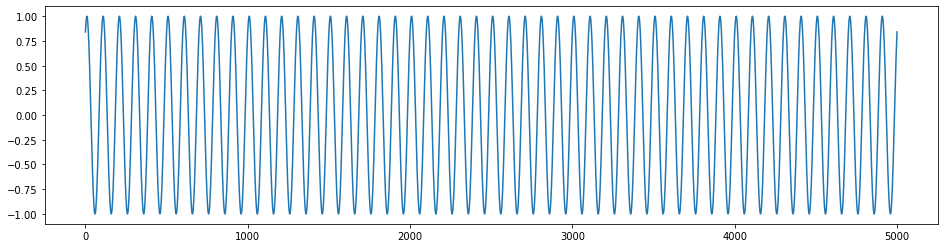

In [ ]:
dataset["Wave"][:].plot(figsize=(16,4),legend=False)

In [ ]:
def normalise_windows(window_data):
    # A support function to normalize a dataset
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def load_data(dataset, column, seq_len, normalise_window):
    # A support function to help prepare datasets for an RNN/LSTM/GRU
    data = dataset.loc[:,column]
    sequence_length = seq_len + 1
    result = []
    
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)
    result = np.array(result)

    #Last 10% is used for validation test, first 90% for training
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

In [ ]:
Enrol_window = 100
feature_train, label_train, feature_test, label_test = load_data(dataset, 'Wave', Enrol_window, False)
print ('Datasets generated')

Datasets generated


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(feature_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')
print ('model compiled')
print (model.summary())

model compiled
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(feature_train)

4410

In [ ]:
history =  model.fit(feature_train, label_train, batch_size=512, epochs=10, validation_data = (feature_test, label_test))



Train on 4410 samples, validate on 490 samples
Epoch 1/10
4410/4410 [==============================] - 3s 752us/step - loss: 0.2842 - val_loss: 0.1226
Epoch 2/10
4410/4410 [==============================] - 2s 555us/step - loss: 0.0622 - val_loss: 0.0068
Epoch 3/10
4410/4410 [==============================] - 2s 529us/step - loss: 0.0131 - val_loss: 0.0030
Epoch 4/10
4410/4410 [==============================] - 2s 544us/step - loss: 0.0065 - val_loss: 0.0033
Epoch 5/10
4410/4410 [==============================] - 2s 542us/step - loss: 0.0065 - val_loss: 4.2166e-04
Epoch 6/10
4410/4410 [==============================] - 2s 542us/step - loss: 0.0050 - val_loss: 3.7293e-04
Epoch 7/10
4410/4410 [==============================] - 2s 548us/step - loss: 0.0045 - val_loss: 1.6371e-04
Epoch 8/10
4410/4410 [==============================] - 2s 533us/step - loss: 0.0040 - val_loss: 1.7421e-04
Epoch 9/10
4410/4410 [==============================] - 2s 542us/step - loss: 0.0040 - val_loss: 1.2098

In [ ]:
model = Sequential()
model.add(LSTM(40, return_sequences=True, input_shape=(feature_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(70, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')
print ('model compiled')
print (model.summary())

model compiled
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 100, 40)           6720      
_________________________________________________________________
dropout_27 (Dropout)         (None, 100, 40)           0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 70)                31080     
_________________________________________________________________
dropout_28 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 71        
Total params: 37,871
Trainable params: 37,871
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history_adv =  model.fit(feature_train, label_train, batch_size=256, epochs=10, validation_data = (feature_test, label_test))

Train on 4410 samples, validate on 490 samples
Epoch 1/10
4410/4410 [==============================] - 7s 2ms/step - loss: 0.2351 - val_loss: 0.0387
Epoch 2/10
4410/4410 [==============================] - 5s 1ms/step - loss: 0.0188 - val_loss: 7.5572e-04
Epoch 3/10
4410/4410 [==============================] - 5s 1ms/step - loss: 0.0084 - val_loss: 4.9922e-04
Epoch 4/10
4410/4410 [==============================] - 5s 1ms/step - loss: 0.0065 - val_loss: 4.0460e-04
Epoch 5/10
4410/4410 [==============================] - 5s 1ms/step - loss: 0.0056 - val_loss: 2.1711e-04
Epoch 6/10
4410/4410 [==============================] - 5s 1ms/step - loss: 0.0052 - val_loss: 2.3887e-04
Epoch 7/10
4410/4410 [==============================] - 5s 1ms/step - loss: 0.0047 - val_loss: 5.4890e-05
Epoch 8/10
4410/4410 [==============================] - 5s 1ms/step - loss: 0.0048 - val_loss: 1.1725e-04
Epoch 9/10
4410/4410 [==============================] - 5s 1ms/step - loss: 0.0046 - val_loss: 2.0879e-05
Epo

Text(0.5, 1.0, 'Графіки втрат покращеної моделі')

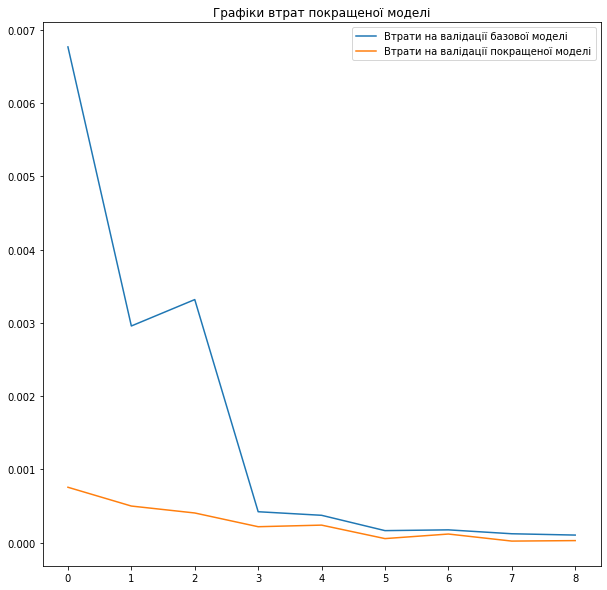

In [ ]:
val_loss = history.history['val_loss']
val_loss_adv = history_adv.history['val_loss']
val_loss = val_loss[1:] 
val_loss_adv = val_loss_adv[1:]
epochs_range = range(9)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, val_loss, label='Втрати на валідації базової моделі')
plt.plot(epochs_range, val_loss_adv, label='Втрати на валідації покращеної моделі')
plt.legend(loc='upper right')
plt.title(f'Графіки втрат покращеної моделі')

In [ ]:
from numpy import newaxis

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

In [ ]:
def plot_results(predicted_data, true_data): 
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111) 
    ax.plot(true_data, label='True Data') 
    plt.plot(predicted_data, label='Prediction') 
    plt.legend(loc='upper left') 
    plt.show() 

In [ ]:
#Let's use the model and predict the wave
predictions= predict_sequence_full(model, feature_test, Enrol_window)

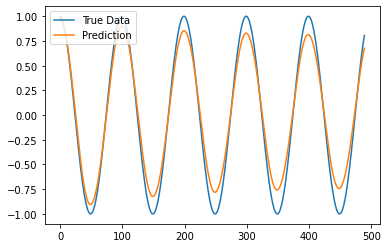

In [ ]:
plot_results(predictions,label_test)

**Case 2. NY Stock Price Prediction RNN LSTM GRU**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# tensorflow 1
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()

# tensorflow 2
from tensorflow import keras
from tensorflow.keras import layers

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10
test_set_size_percentage = 10

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10
test_set_size_percentage = 10
#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())))
print(os.getcwd()+':', os.listdir(os.getcwd()))

/: ['srv', 'usr', 'var', 'opt', 'sys', 'media', 'boot', 'mnt', 'dev', 'lib', 'lib64', 'proc', 'home', 'root', 'bin', 'sbin', 'run', 'etc', 'tmp', 'content', '.dockerenv', 'tools', 'datalab', 'tensorflow-1.15.2', 'lib32', 'python-apt']
/content: ['.config', 'Sin Wave Data Generator.csv', 'prices-split-adjusted.csv', 'sample_data']


In [ ]:
# import all stock prices 
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

number of different stocks:  501
['DPS', 'FE', 'SLB', 'FIS', 'GIS', 'FISV', 'LNC', 'HRS', 'GS', 'ALXN']


In [ ]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [ ]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


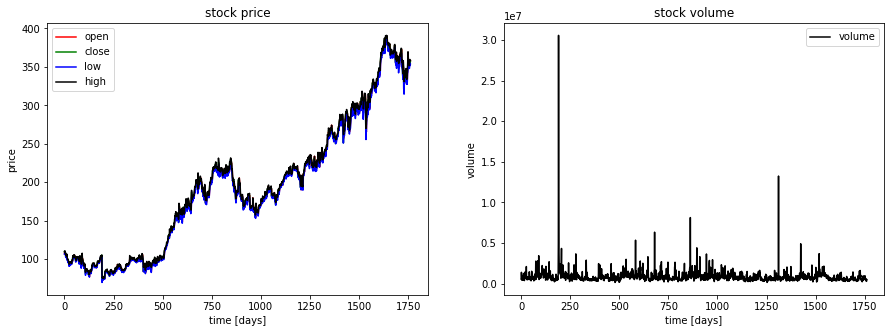

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [ ]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# choose one stock
df_stock = df[df.symbol == 'EQIX'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['open', 'close', 'low', 'high']
x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


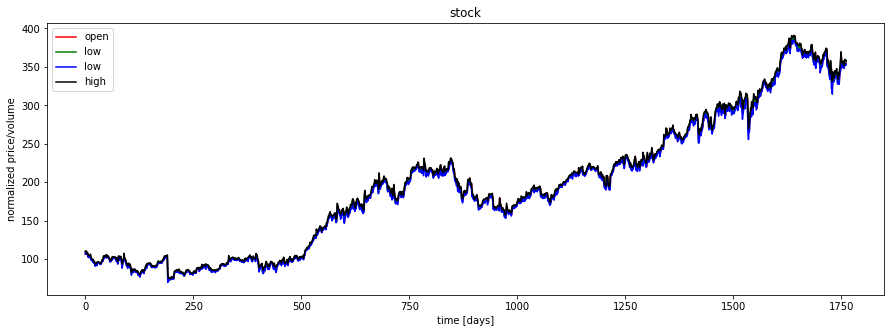

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df_stock.open.values, color='red', label='open')
plt.plot(df_stock.close.values, color='green', label='low')
plt.plot(df_stock.low.values, color='blue', label='low')
plt.plot(df_stock.high.values, color='black', label='high')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [ ]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)

list_mse_valid = []                                         
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid})
            list_mse_valid.append(mse_valid)
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})
    

0.00 epochs: MSE train/valid = 0.077204/0.030594
4.99 epochs: MSE train/valid = 0.000158/0.000936
9.97 epochs: MSE train/valid = 0.000122/0.000573
14.96 epochs: MSE train/valid = 0.000129/0.000680
19.94 epochs: MSE train/valid = 0.000097/0.000474
24.93 epochs: MSE train/valid = 0.000113/0.000335
29.91 epochs: MSE train/valid = 0.000084/0.000287
34.90 epochs: MSE train/valid = 0.000086/0.000266
39.89 epochs: MSE train/valid = 0.000081/0.000264
44.87 epochs: MSE train/valid = 0.000071/0.000233
49.86 epochs: MSE train/valid = 0.000069/0.000246
54.84 epochs: MSE train/valid = 0.000068/0.000270
59.83 epochs: MSE train/valid = 0.000089/0.000425
64.81 epochs: MSE train/valid = 0.000088/0.000270
69.80 epochs: MSE train/valid = 0.000064/0.000239
74.78 epochs: MSE train/valid = 0.000064/0.000198
79.77 epochs: MSE train/valid = 0.000065/0.000230
84.76 epochs: MSE train/valid = 0.000063/0.000240
89.74 epochs: MSE train/valid = 0.000063/0.000199
94.73 epochs: MSE train/valid = 0.000139/0.000367
99.

correct sign prediction for close - open price for train/valid/test: 0.74/0.44/0.40


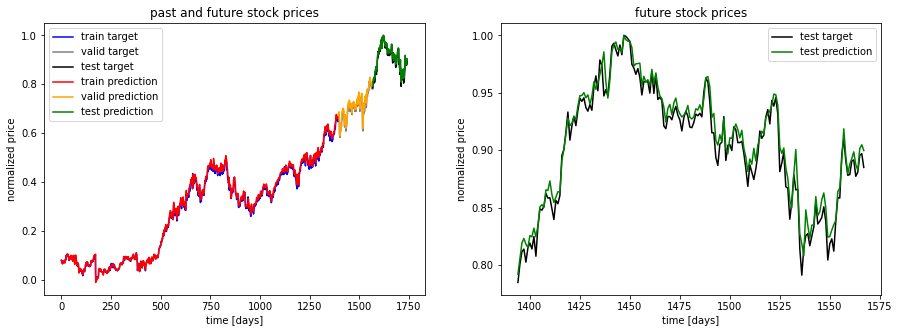

In [ ]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

In [ ]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 180 
n_outputs = 4
n_layers = 2
dropout_rate = 0
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = []
for i in range(n_layers):
    layers.append(tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu),
                                              output_keep_prob=1-dropout_rate))
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
list_mse_valid_adv = []

# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid})
            list_mse_valid_adv.append(mse_valid) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})
    

0.00 epochs: MSE train/valid = 0.043802/0.168306
4.99 epochs: MSE train/valid = 0.000201/0.000964
9.97 epochs: MSE train/valid = 0.000154/0.000599
14.96 epochs: MSE train/valid = 0.000137/0.000541
19.94 epochs: MSE train/valid = 0.000133/0.000405
24.93 epochs: MSE train/valid = 0.000102/0.000446
29.91 epochs: MSE train/valid = 0.000094/0.000358
34.90 epochs: MSE train/valid = 0.000113/0.000331
39.89 epochs: MSE train/valid = 0.000099/0.000326
44.87 epochs: MSE train/valid = 0.000089/0.000397
49.86 epochs: MSE train/valid = 0.000094/0.000466
54.84 epochs: MSE train/valid = 0.000076/0.000245
59.83 epochs: MSE train/valid = 0.000101/0.000499
64.81 epochs: MSE train/valid = 0.000084/0.000236
69.80 epochs: MSE train/valid = 0.000074/0.000233
74.78 epochs: MSE train/valid = 0.000087/0.000269
79.77 epochs: MSE train/valid = 0.000068/0.000242
84.76 epochs: MSE train/valid = 0.000064/0.000211
89.74 epochs: MSE train/valid = 0.000081/0.000274
94.73 epochs: MSE train/valid = 0.000077/0.000327
99.

In [ ]:
y_train.shape

(1394, 4)

correct sign prediction for close - open price for train/valid/test: 0.75/0.64/0.61


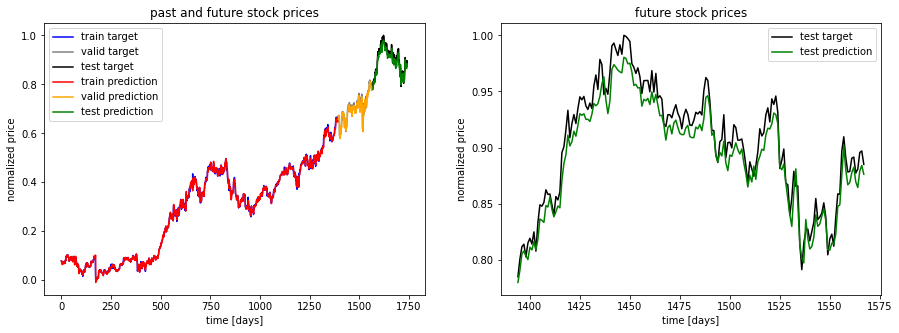

In [ ]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

Text(0.5, 1.0, 'Графіки втрат покращеної моделі')

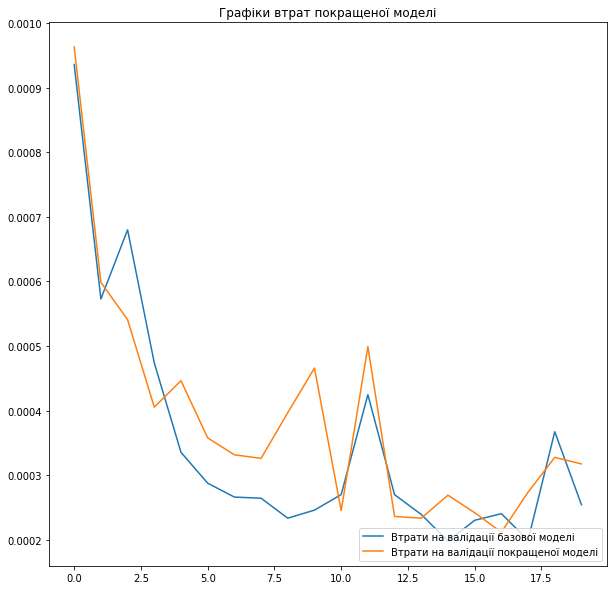

In [ ]:
val_loss = list_mse_valid
val_loss_adv = list_mse_valid_adv
val_loss = val_loss[1:] 
val_loss_adv = val_loss_adv[1:]
epochs_range = range(20)

plt.figure(figsize=(10,10))
plt.plot(epochs_range, val_loss, label='Втрати на валідації базової моделі')
plt.plot(epochs_range, val_loss_adv, label='Втрати на валідації покращеної моделі')
plt.legend(loc='lower right')
plt.title(f'Графіки втрат покращеної моделі')